In [2]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, accuracy_score
import numpy as np
import joblib


# Path to your CSV file
# file_path = 'data_simulation_new1.csv'
file_path = 'data_simulation_new1.csv'
# Read the CSV file into a DataFrame
df = pd.read_csv(file_path)

# Verify the column presence before any processing
print("\nColumns in original DataFrame:")
print(df.columns)

'''
# Dropping columns that are not useful for the prediction
df.drop(columns=['NOME',
                 'COGNOME',
                 'TELEFONO',
                 'CELLULARE',
                 'EMAIL',
                 'CAP',
                 'INDIRIZZO',
                 'CODICE_FISCALE',
                 'IBAN',
                 'COMUNE_NASCITA',
                 'DATA_NASCITA',
                 'TFR',
                 'NOME_AZIENDA',
                 'CODICE_FISCALE_AZIENDA',
                 'PARTITA_IVA_AZIENDA',
                 'DOCUMENTAZIONE_PENSIONATO',
                 'REGISTRAZIONE_TEL_PRIMO_CONTATTO',
                 'NOTE_LAVORAZIONE_CONTATTO'
                 ], inplace=True)
'''


# Dropping columns that are not useful for the prediction
df.drop(columns=['NOME',
                 'COGNOME',
                 'TELEFONO',
                 'CELLULARE',
                 'EMAIL',
                 'CAP',
                 'INDIRIZZO',
                 'CODICE_FISCALE',
                 'IBAN',
                 'COMUNE_NASCITA',
                 'DATA_NASCITA',
                 'IMPORTO_STIPENDIO_PENSIONE',
                 'TFR',
                 'DATA_ ASSUNZIONE_PENSIONAMENTO',
                 'NOME_AZIENDA',
                 'CODICE_FISCALE_AZIENDA',
                 'PARTITA_IVA_AZIENDA',
                 'TEMPO_INDETERMINATO',
                 'PREVENTIVI_CONCORRENZA',
                 'TRATTENUTE_BUSTA_PAGA_PENSIONE',
                 'ALTRI_FINANZIAMENTI_ PRESENTI',
                 'DOCUMENTAZIONE_PENSIONATO',
                 'REGISTRAZIONE_TEL_PRIMO_CONTATTO',
                 'NOTE_LAVORAZIONE_CONTATTO'
                 ], inplace=True)

df.info()


Columns in original DataFrame:
Index(['NOME', 'COGNOME', 'IMPORTO_RICHIESTO', 'TELEFONO', 'CELLULARE',
       'TIPO DI OCCUPAZIONE', 'PROVINCIA', 'CONSENSO_DATI_PRIVACY',
       'CONSENSO_DATI_MRKTG', 'CONSENSO_DATI_CESSIONE_TERZI', 'SESSO', 'EMAIL',
       'REGIONE', 'COMUNE', 'CAP', 'INDIRIZZO', 'CODICE_FISCALE', 'IBAN',
       'COMUNE_NASCITA', 'DATA_NASCITA', 'AGE', 'anni lavorativi',
       'MOTIVAZIONE_PRESTITO', 'IMPORTO_STIPENDIO_PENSIONE', 'TFR',
       'DATA_ ASSUNZIONE_PENSIONAMENTO', 'NOME_AZIENDA', 'TIPO_AZIENDA',
       'CODICE_FISCALE_AZIENDA', 'PARTITA_IVA_AZIENDA', 'TEMPO_INDETERMINATO',
       'PREVENTIVI_CONCORRENZA', 'TRATTENUTE_BUSTA_PAGA_PENSIONE',
       'ALTRI_FINANZIAMENTI_ PRESENTI', 'DOCUMENTAZIONE_PENSIONATO',
       'REGISTRAZIONE_TEL_PRIMO_CONTATTO', 'NOTE_LAVORAZIONE_CONTATTO'],
      dtype='object')
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 15000 entries, 0 to 14999
Data columns (total 13 columns):
 #   Column                        Non-Null Cou

In [3]:
import pandas as pd
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split, GridSearchCV
from xgboost import XGBClassifier
from sklearn.metrics import accuracy_score, classification_report
import joblib

# Assuming df is your DataFrame and it's already loaded
# df = pd.read_csv('your_data.csv')  # If you need to load data

# Encode categorical variables using LabelEncoder
encoders = {}
for column in df.columns:
    if df[column].dtype == 'object' or df[column].dtype.name == 'category':
        le = LabelEncoder()
        df[column] = le.fit_transform(df[column])
        encoders[column] = le

# Split the target variable
y = df['MOTIVAZIONE_PRESTITO']
X = df.drop(columns=['MOTIVAZIONE_PRESTITO'])

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.15, random_state=42)

# Define the parameter grid for GridSearchCV
'''
param_grid = {
    'n_estimators': [100, 200, 300],
    'max_depth': [3, 6, 10],
    'learning_rate': [0.01, 0.1, 0.2],
    'subsample': [0.6, 0.8, 1.0],
    'colsample_bytree': [0.6, 0.8, 1.0]
}
'''

param_grid = {
    'n_estimators': [300],
    'max_depth': [3],
    'learning_rate': [0.0001],
    'subsample': [0.8],
    'colsample_bytree': [0.6]
}


# Initialize XGBClassifier
clf = XGBClassifier(objective='binary:logistic', random_state=42)

# Initialize GridSearchCV
grid_search = GridSearchCV(estimator=clf, param_grid=param_grid, cv=3, n_jobs=-1, verbose=2)

# Fit GridSearchCV to the training data
grid_search.fit(X_train, y_train)

# Get the best model
best_clf = grid_search.best_estimator_

# Save the best model to a binary file
joblib.dump(best_clf, 'xgboost_model.pkl')
joblib.dump(encoders, 'xgboost_encoders.pkl')

# Get feature importances
importances = best_clf.feature_importances_
feature_importances = pd.DataFrame(
    {'feature': X.columns, 'importance': importances})
feature_importances.sort_values(by='importance', ascending=False, inplace=True)

# Print the feature importances
print("\nFeature Importances:")
print(feature_importances)

# Predict on the test set using the best model
y_pred = best_clf.predict(X_test)

# Evaluate the model
print(f"\nAccuracy: {accuracy_score(y_test, y_pred)}")
print("\nClassification Report:")
# Use zero_division=0 to handle the warning
print(classification_report(y_test, y_pred, zero_division=0))

# Print the best parameters found by GridSearchCV
print("\nBest parameters found by GridSearchCV:")
print(grid_search.best_params_)

Fitting 3 folds for each of 1 candidates, totalling 3 fits

Feature Importances:
                         feature  importance
7                        REGIONE    0.094835
1            TIPO DI OCCUPAZIONE    0.092478
8                         COMUNE    0.091593
0              IMPORTO_RICHIESTO    0.091389
2                      PROVINCIA    0.088806
10               anni lavorativi    0.087502
9                            AGE    0.084889
6                          SESSO    0.080239
3          CONSENSO_DATI_PRIVACY    0.074650
5   CONSENSO_DATI_CESSIONE_TERZI    0.071992
11                  TIPO_AZIENDA    0.071193
4            CONSENSO_DATI_MRKTG    0.070435

Accuracy: 0.08

Classification Report:
              precision    recall  f1-score   support

           0       0.00      0.00      0.00        94
           1       0.00      0.00      0.00        95
           2       0.00      0.00      0.00       108
           3       0.08      0.98      0.15       179
           4       0.00

In [6]:
'''import pandas as pd
#from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split, GridSearchCV
#from xgboost import XGBClassifier
#from sklearn.metrics import accuracy_score, classification_report
import joblib
 
# Path to your CSV file
# file_path = 'data_simulation_new1.csv'
file_path = 'data_simulation_new1.csv'
# Read the CSV file into a DataFrame
df = pd.read_csv(file_path)
 
# Verify the column presence before any processing
#print("\nColumns in original DataFrame:")
#print(df.columns)
 
 
# Dropping columns that are not useful for the prediction
df.drop(columns=['NOME',
                 'COGNOME',
                 'TELEFONO',
                 'CELLULARE',
                 'EMAIL',
                 'CAP',
                 'INDIRIZZO',
                 'CODICE_FISCALE',
                 'IBAN',
                 'COMUNE_NASCITA',
                 'DATA_NASCITA',
                 'IMPORTO_STIPENDIO_PENSIONE',
                 'TFR',
                 'DATA_ ASSUNZIONE_PENSIONAMENTO',
                 'NOME_AZIENDA',
                 'CODICE_FISCALE_AZIENDA',
                 'PARTITA_IVA_AZIENDA',
                 'TEMPO_INDETERMINATO',
                 'PREVENTIVI_CONCORRENZA',
                 'TRATTENUTE_BUSTA_PAGA_PENSIONE',
                 'ALTRI_FINANZIAMENTI_ PRESENTI',
                 'DOCUMENTAZIONE_PENSIONATO',
                 'REGISTRAZIONE_TEL_PRIMO_CONTATTO',
                 'NOTE_LAVORAZIONE_CONTATTO'
                 ], inplace=True)
 
 
y = df['MOTIVAZIONE_PRESTITO']
X = df.drop(columns=['MOTIVAZIONE_PRESTITO'])
 '''
 
# Example new customer profile
new_customer = {
    'IMPORTO_RICHIESTO': 15000,
    'TIPO DI OCCUPAZIONE': 'Assistente Sociale',
    'PROVINCIA': 'Napoli',
    'CONSENSO_DATI_PRIVACY': 'si',
    'CONSENSO_DATI_MRKTG': 'si',
    'CONSENSO_DATI_CESSIONE_TERZI': 'si',
    'SESSO': 'F',
    'REGIONE': 'Campania',
    'COMUNE': 'Napoli',
    'AGE': 62,
    'anni lavorativi': 37,
    #'IMPORTO_STIPENDIO_PENSIONE': 1000,
    #'anni_lavorativi_Category': '41',
    'TIPO_AZIENDA': 'Pubblica'
    #'TEMPO_INDETERMINATO': 'no',
    #'PREVENTIVI_CONCORRENZA': 'no',
    #'TRATTENUTE_BUSTA_PAGA_PENSIONE': 'si',
    #'ALTRI_FINANZIAMENTI_PRESENTI': 'no'
}
 
 
# Load the trained XGBClassifier model and encoders
clf_loaded = joblib.load('xgboost_model.pkl')
encoders_loaded = joblib.load('xgboost_encoders.pkl')
 
 
# Encode the new customer profile using the loaded LabelEncoders
for column in new_customer:
    if column in encoders_loaded:
        new_customer[column] = encoders_loaded[column].transform(
            [new_customer[column]])[0]
 
# Convert the new customer profile to a DataFrame
new_customer_df = pd.DataFrame([new_customer])
 
# Ensure the new customer dataframe has the same columns as the training set
missing_cols = set(X.columns) - set(new_customer_df.columns)
for col in missing_cols:
    new_customer_df[col] = 0
new_customer_df = new_customer_df[X.columns]
 
# Predict the MOTIVAZIONE_PRESTITO for the new customer using the loaded model
prediction = clf_loaded.predict(new_customer_df)
print(f"\nPredicted MOTIVAZIONE_PRESTITO for new customer: {prediction[0]}")
 
# Predict the probabilities
predicted_probabilities = clf_loaded.predict_proba(new_customer_df)
 
# Convert the probabilities into a DataFrame
probabilities_df = pd.DataFrame(
    predicted_probabilities, columns=encoders_loaded['MOTIVAZIONE_PRESTITO'].classes_)
 
print(f"Predicted probabilities for each class:")
print(probabilities_df.transpose())


Predicted MOTIVAZIONE_PRESTITO for new customer: 3
Predicted probabilities for each class:
                                  0
Corsi/Specializzazioni     0.055304
Risarcimenti               0.055389
acquisto arredamento casa  0.055363
acquisto auto/moto         0.055978
acquisto immobili          0.055674
anticipo prima casa        0.055402
consolidamento debiti      0.055650
investimenti               0.055216
liquidità                  0.055533
non specificata            0.055350
pagamenti imposte e tasse  0.055597
rinegoziazione             0.055290
ristrutturazione casa      0.055890
spese dentistiche          0.055785
spese medico sanitarie     0.055787
spese per cerimonie        0.055864
spese universitarie        0.055476
spese viaggi               0.055453


In [ ]:
'''import pandas as pd
#from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split, GridSearchCV
#from xgboost import XGBClassifier
#from sklearn.metrics import accuracy_score, classification_report
import joblib
 
# Path to your CSV file
# file_path = 'data_simulation_new1.csv'
file_path = 'data_simulation_new1.csv'
# Read the CSV file into a DataFrame
df = pd.read_csv(file_path)
 
# Verify the column presence before any processing
#print("\nColumns in original DataFrame:")
#print(df.columns)
 
 
# Dropping columns that are not useful for the prediction
df.drop(columns=['NOME',
                 'COGNOME',
                 'TELEFONO',
                 'CELLULARE',
                 'EMAIL',
                 'CAP',
                 'INDIRIZZO',
                 'CODICE_FISCALE',
                 'IBAN',
                 'COMUNE_NASCITA',
                 'DATA_NASCITA',
                 'IMPORTO_STIPENDIO_PENSIONE',
                 'TFR',
                 'DATA_ ASSUNZIONE_PENSIONAMENTO',
                 'NOME_AZIENDA',
                 'CODICE_FISCALE_AZIENDA',
                 'PARTITA_IVA_AZIENDA',
                 'TEMPO_INDETERMINATO',
                 'PREVENTIVI_CONCORRENZA',
                 'TRATTENUTE_BUSTA_PAGA_PENSIONE',
                 'ALTRI_FINANZIAMENTI_ PRESENTI',
                 'DOCUMENTAZIONE_PENSIONATO',
                 'REGISTRAZIONE_TEL_PRIMO_CONTATTO',
                 'NOTE_LAVORAZIONE_CONTATTO'
                 ], inplace=True)
 
 
y = df['MOTIVAZIONE_PRESTITO']
X = df.drop(columns=['MOTIVAZIONE_PRESTITO'])
 '''

# Example new customer profile
new_customer = {
    'IMPORTO_RICHIESTO': 15000,
    'TIPO DI OCCUPAZIONE': 'Assistente Sociale',
    'PROVINCIA': 'Napoli',
    'CONSENSO_DATI_PRIVACY': 'si',
    'CONSENSO_DATI_MRKTG': 'si',
    'CONSENSO_DATI_CESSIONE_TERZI': 'si',
    'SESSO': 'F',
    'REGIONE': 'Campania',
    'COMUNE': 'Napoli',
    'AGE': 62,
    'anni lavorativi': 37,
    # 'IMPORTO_STIPENDIO_PENSIONE': 1000,
    # 'anni_lavorativi_Category': '41',
    'TIPO_AZIENDA': 'Pubblica'
    # 'TEMPO_INDETERMINATO': 'no',
    # 'PREVENTIVI_CONCORRENZA': 'no',
    # 'TRATTENUTE_BUSTA_PAGA_PENSIONE': 'si',
    # 'ALTRI_FINANZIAMENTI_PRESENTI': 'no'
}


# Load the trained XGBClassifier model and encoders
clf_loaded = joblib.load('xgboost_model.pkl')
encoders_loaded = joblib.load('xgboost_encoders.pkl')


# Encode the new customer profile using the loaded LabelEncoders
for column in new_customer:
    if column in encoders_loaded:
        new_customer[column] = encoders_loaded[column].transform(
            [new_customer[column]])[0]

# Convert the new customer profile to a DataFrame
new_customer_df = pd.DataFrame([new_customer])

# Ensure the new customer dataframe has the same columns as the training set
missing_cols = set(X.columns) - set(new_customer_df.columns)
for col in missing_cols:
    new_customer_df[col] = 0
new_customer_df = new_customer_df[X.columns]

# Predict the MOTIVAZIONE_PRESTITO for the new customer using the loaded model
prediction = clf_loaded.predict(new_customer_df)
print(f"\nPredicted MOTIVAZIONE_PRESTITO for new customer: {prediction[0]}")

# Predict the probabilities
predicted_probabilities = clf_loaded.predict_proba(new_customer_df)

# Convert the probabilities into a DataFrame
probabilities_df = pd.DataFrame(
    predicted_probabilities, columns=encoders_loaded['MOTIVAZIONE_PRESTITO'].classes_)

print(f"Predicted probabilities for each class:")
print(probabilities_df.transpose())


Columns in original DataFrame:
Index(['NOME', 'COGNOME', 'IMPORTO_RICHIESTO', 'TELEFONO', 'CELLULARE',
       'TIPO DI OCCUPAZIONE', 'PROVINCIA', 'CONSENSO_DATI_PRIVACY',
       'CONSENSO_DATI_MRKTG', 'CONSENSO_DATI_CESSIONE_TERZI', 'SESSO', 'EMAIL',
       'REGIONE', 'COMUNE', 'CAP', 'INDIRIZZO', 'CODICE_FISCALE', 'IBAN',
       'COMUNE_NASCITA', 'DATA_NASCITA', 'AGE', 'anni lavorativi',
       'MOTIVAZIONE_PRESTITO', 'IMPORTO_STIPENDIO_PENSIONE', 'TFR',
       'DATA_ ASSUNZIONE_PENSIONAMENTO', 'NOME_AZIENDA', 'TIPO_AZIENDA',
       'CODICE_FISCALE_AZIENDA', 'PARTITA_IVA_AZIENDA', 'TEMPO_INDETERMINATO',
       'PREVENTIVI_CONCORRENZA', 'TRATTENUTE_BUSTA_PAGA_PENSIONE',
       'ALTRI_FINANZIAMENTI_ PRESENTI', 'DOCUMENTAZIONE_PENSIONATO',
       'REGISTRAZIONE_TEL_PRIMO_CONTATTO', 'NOTE_LAVORAZIONE_CONTATTO'],
      dtype='object')
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 15000 entries, 0 to 14999
Data columns (total 19 columns):
 #   Column                          Non-Null C

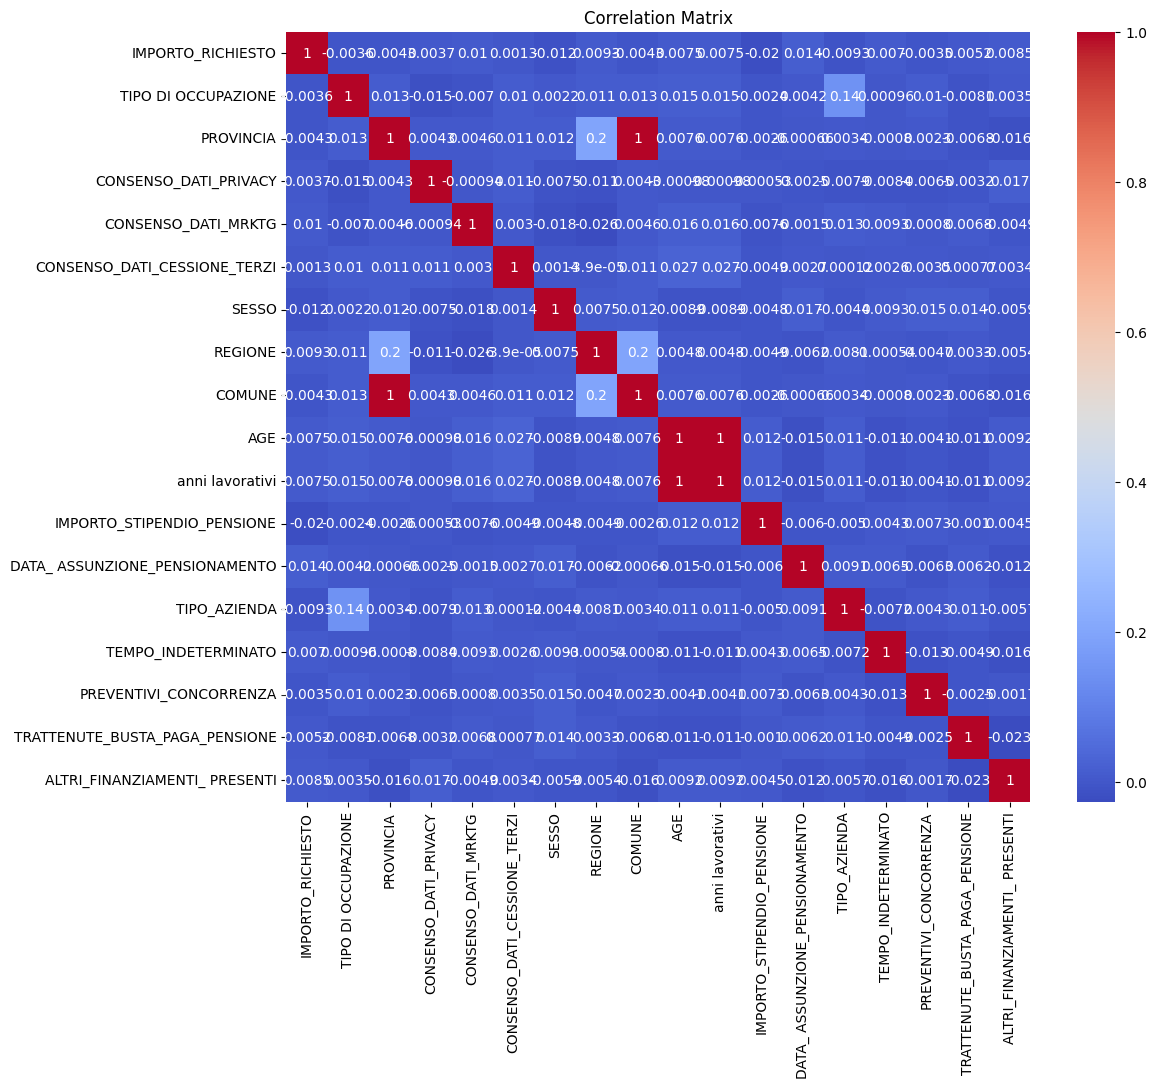

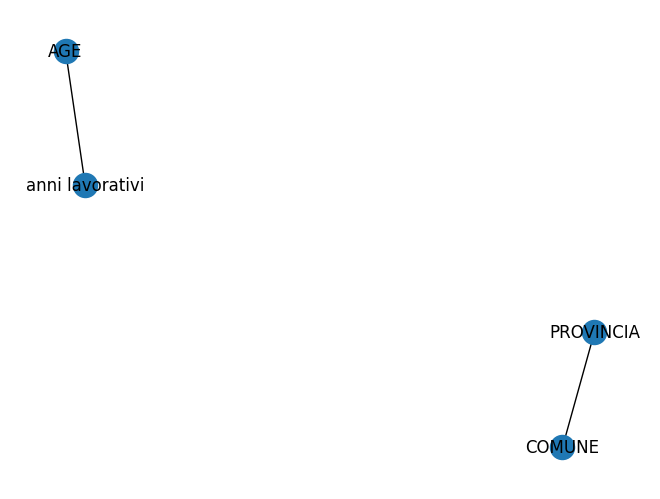

In [13]:

import pandas as pd
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report
import networkx as nx
import matplotlib.pyplot as plt
import seaborn as sns  # Import seaborn for heatmap
import plotly.graph_objs as go
import joblib

# Path to your CSV file
# file_path = 'data_simulation_new1.csv'
file_path = 'data_simulation_new1.csv'
# Read the CSV file into a DataFrame
df = pd.read_csv(file_path)

# Verify the column presence before any processing
print("\nColumns in original DataFrame:")
print(df.columns)


# Dropping columns that are not useful for the prediction
df.drop(columns=['NOME',
                 'COGNOME',
                 'TELEFONO',
                 'CELLULARE',
                 'EMAIL',
                 'CAP',
                 'INDIRIZZO',
                 'CODICE_FISCALE',
                 'IBAN',
                 'COMUNE_NASCITA',
                 'DATA_NASCITA',
                 'TFR',
                 'NOME_AZIENDA',
                 'CODICE_FISCALE_AZIENDA',
                 'PARTITA_IVA_AZIENDA',
                 'DOCUMENTAZIONE_PENSIONATO',
                 'REGISTRAZIONE_TEL_PRIMO_CONTATTO',
                 'NOTE_LAVORAZIONE_CONTATTO'
                 ], inplace=True)

df.info()

# Encode categorical variables using LabelEncoder
encoders = {}
for column in df.columns:
    if df[column].dtype == 'object' or df[column].dtype.name == 'category':
        le = LabelEncoder()
        df[column] = le.fit_transform(df[column])
        encoders[column] = le

# Split the target variable
y = df['MOTIVAZIONE_PRESTITO']
X = df.drop(columns=['MOTIVAZIONE_PRESTITO'])

# Standardize numerical variables
scaler = StandardScaler()
X = pd.DataFrame(scaler.fit_transform(X), columns=X.columns)

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.30, random_state=42)

# Fit a RandomForestClassifier
clf = RandomForestClassifier(n_estimators=100, random_state=42)
clf.fit(X_train, y_train)

# Predict on the test set
y_pred = clf.predict(X_test)

# Evaluate the model
print(f"Accuracy: {accuracy_score(y_test, y_pred)}")
print("Classification Report:")
print(classification_report(y_test, y_pred, zero_division=0))

# Save the model and encoders
joblib.dump(clf, 'random_forest_model.pkl')
joblib.dump(encoders, 'encoders.pkl')

# Get feature importances
importances = clf.feature_importances_
feature_importances = pd.DataFrame(
    {'feature': X.columns, 'importance': importances})
feature_importances.sort_values(by='importance', ascending=False, inplace=True)

# Print the feature importances
print("\nFeature Importances:")
print(feature_importances)

# Visualize the correlation matrix
correlation_matrix = X.corr()

plt.figure(figsize=(12, 10))
plt.title('Correlation Matrix')
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm')
plt.show()

# Create a NetworkX graph from the correlation matrix
G = nx.Graph()

threshold = 0.5  # Adjust threshold based on your preference
for i, row in correlation_matrix.iterrows():
    for j, val in row.items():
        if i != j and abs(val) > threshold:  # Filter for strong correlations
            G.add_edge(i, j, weight=val)

# Draw the graph using NetworkX
pos = nx.spring_layout(G)
weights = [G[u][v]['weight'] for u, v in G.edges()]
nx.draw(G, pos, with_labels=True, width=weights)
plt.show()

# Interactive visualization using Plotly
edge_trace = []
for edge in G.edges():
    x0, y0 = pos[edge[0]]
    x1, y1 = pos[edge[1]]
    edge_trace.append(go.Scatter(
        x=[x0, x1, None],
        y=[y0, y1, None],
        line=dict(width=0.5, color='#888'),
        hoverinfo='none',
        mode='lines'))

node_trace = go.Scatter(
    x=[],
    y=[],
    text=[],
    mode='markers+text',
    textposition="top center",
    hoverinfo='text',
    marker=dict(
        showscale=True,
        colorscale='YlGnBu',
        size=10,
        colorbar=dict(
            thickness=15,
            title='Node Connections',
            xanchor='left',
            titleside='right'
        ),
    )
)

for node in G.nodes():
    x, y = pos[node]
    node_trace['x'] += tuple([x])
    node_trace['y'] += tuple([y])
    node_trace['text'] += tuple([node])

fig = go.Figure(data=edge_trace + [node_trace],
                layout=go.Layout(
                showlegend=False,
                hovermode='closest',
                margin=dict(b=0, l=0, r=0, t=40),
                annotations=[dict(
                    text="Network Graph",
                    showarrow=False,
                    xref="paper", yref="paper",
                    x=0.5, y=0.5,
                    font=dict(size=20)
                )]
                )
                )

fig.show()

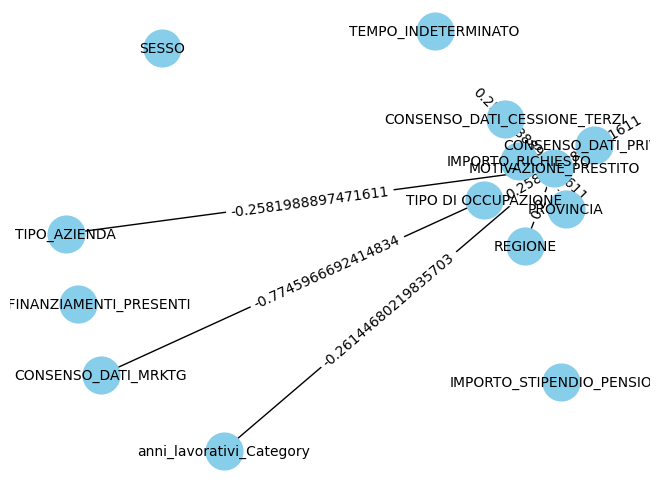

In [5]:
import pandas as pd
import networkx as nx
import matplotlib.pyplot as plt
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split

# Example DataFrame similar to your previous example
data = {
    'IMPORTO_RICHIESTO': [2000, 1500, 2500, 3000],
    'TIPO DI OCCUPAZIONE': ['Funzionario', 'Impiegato', 'Operaio', 'Dirigente'],
    'PROVINCIA': ['Matera', 'Bari', 'Napoli', 'Roma'],
    'CONSENSO_DATI_PRIVACY': ['si', 'no', 'si', 'si'],
    'CONSENSO_DATI_MRKTG': ['si', 'si', 'no', 'si'],
    'CONSENSO_DATI_CESSIONE_TERZI': ['si', 'no', 'si', 'si'],
    'SESSO': ['M', 'F', 'M', 'F'],
    'REGIONE': ['Basilicata', 'Puglia', 'Campania', 'Lazio'],
    'IMPORTO_STIPENDIO_PENSIONE': [3000, 2000, 2500, 3500],
    'anni_lavorativi_Category': [41, 20, 30, 35],
    'TIPO_AZIENDA': ['Privata', 'Pubblica', 'Privata', 'Privata'],
    'TEMPO_INDETERMINATO': ['no', 'yes', 'no', 'yes'],
    'ALTRI_FINANZIAMENTI_PRESENTI': ['no', 'yes', 'no', 'yes'],
    'MOTIVAZIONE_PRESTITO': ['Auto', 'Casa', 'Vacanza', 'Matrimonio']
}

df = pd.DataFrame(data)

# Encode categorical variables using LabelEncoder
encoders = {}
for column in df.columns:
    if df[column].dtype == 'object' or df[column].dtype.name == 'category':
        le = LabelEncoder()
        df[column] = le.fit_transform(df[column])
        encoders[column] = le

# Split the target variable
y = df['MOTIVAZIONE_PRESTITO']
X = df.drop(columns=['MOTIVAZIONE_PRESTITO'])

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.30, random_state=42)

# Create a graph using NetworkX
G = nx.Graph()

# Add nodes for each feature and the target variable
for column in X.columns:
    G.add_node(column, label=column)

G.add_node('MOTIVAZIONE_PRESTITO', label='MOTIVAZIONE_PRESTITO')

# Add edges based on correlations (or any other criteria)
correlations = df.corr()

for column in X.columns:
    correlation = correlations[column]['MOTIVAZIONE_PRESTITO']
    if abs(correlation) > 0.1:  # Example threshold for adding edges
        G.add_edge(column, 'MOTIVAZIONE_PRESTITO', weight=correlation)

# Draw the graph
pos = nx.spring_layout(G)
nx.draw(G, pos, with_labels=True, node_size=700,
        node_color='skyblue', font_size=10, font_color='black')
labels = nx.get_edge_attributes(G, 'weight')
nx.draw_networkx_edge_labels(G, pos, edge_labels=labels)

plt.show()

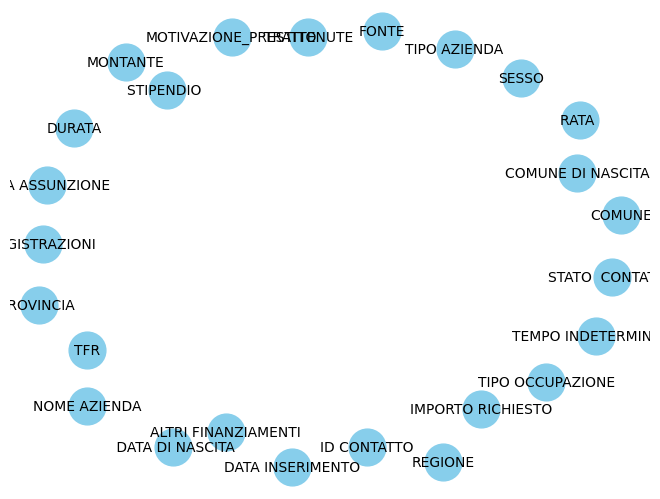

In [9]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, accuracy_score
import numpy as np
import joblib


# Path to your CSV file
# file_path = 'data_simulation_new1.csv'
file_path = 'simulated_data_5000.csv'
# Read the CSV file into a DataFrame
df = pd.read_csv(file_path)


# Encode categorical variables using LabelEncoder
encoders = {}
for column in df.columns:
    if df[column].dtype == 'object' or df[column].dtype.name == 'category':
        le = LabelEncoder()
        df[column] = le.fit_transform(df[column])
        encoders[column] = le

# Split the target variable
y = df['MOTIVAZIONE_PRESTITO']
X = df.drop(columns=['MOTIVAZIONE_PRESTITO'])

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.30, random_state=42)

# Create a graph using NetworkX
G = nx.Graph()

# Add nodes for each feature and the target variable
for column in X.columns:
    G.add_node(column, label=column)

G.add_node('MOTIVAZIONE_PRESTITO', label='MOTIVAZIONE_PRESTITO')

# Add edges based on correlations (or any other criteria)
correlations = df.corr()

for column in X.columns:
    correlation = correlations[column]['MOTIVAZIONE_PRESTITO']
    if abs(correlation) > 0.1:  # Example threshold for adding edges
        G.add_edge(column, 'MOTIVAZIONE_PRESTITO', weight=correlation)

# Draw the graph
pos = nx.spring_layout(G)
nx.draw(G, pos, with_labels=True, node_size=700,
        node_color='skyblue', font_size=10, font_color='black')
labels = nx.get_edge_attributes(G, 'weight')
nx.draw_networkx_edge_labels(G, pos, edge_labels=labels)

plt.show()

In [ ]:
import pandas as pd
from pyvis.network import Network
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split

# Example DataFrame similar to your previous example
data = {
    'IMPORTO_RICHIESTO': [2000, 1500, 2500, 3000],
    'TIPO DI OCCUPAZIONE': ['Funzionario', 'Impiegato', 'Operaio', 'Dirigente'],
    'PROVINCIA': ['Matera', 'Bari', 'Napoli', 'Roma'],
    'CONSENSO_DATI_PRIVACY': ['si', 'no', 'si', 'si'],
    'CONSENSO_DATI_MRKTG': ['si', 'si', 'no', 'si'],
    'CONSENSO_DATI_CESSIONE_TERZI': ['si', 'no', 'si', 'si'],
    'SESSO': ['M', 'F', 'M', 'F'],
    'REGIONE': ['Basilicata', 'Puglia', 'Campania', 'Lazio'],
    'IMPORTO_STIPENDIO_PENSIONE': [3000, 2000, 2500, 3500],
    'anni_lavorativi_Category': [41, 20, 30, 35],
    'TIPO_AZIENDA': ['Privata', 'Pubblica', 'Privata', 'Privata'],
    'TEMPO_INDETERMINATO': ['no', 'yes', 'no', 'yes'],
    'ALTRI_FINANZIAMENTI_PRESENTI': ['no', 'yes', 'no', 'yes'],
    'MOTIVAZIONE_PRESTITO': ['Auto', 'Casa', 'Vacanza', 'Matrimonio']
}

df = pd.DataFrame(data)

# Encode categorical variables using LabelEncoder
encoders = {}
for column in df.columns:
    if df[column].dtype == 'object' or df[column].dtype.name == 'category':
        le = LabelEncoder()
        df[column] = le.fit_transform(df[column])
        encoders[column] = le

# Split the target variable
y = df['MOTIVAZIONE_PRESTITO']
X = df.drop(columns=['MOTIVAZIONE_PRESTITO'])

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.30, random_state=42)

# Create a PyVis network
net = Network(notebook=True, cdn_resources='in_line')

# Add nodes for each feature and the target variable
for column in X.columns:
    net.add_node(column, label=column, title=column)

net.add_node('MOTIVAZIONE_PRESTITO', label='MOTIVAZIONE_PRESTITO',
             title='MOTIVAZIONE_PRESTITO')

# Add edges based on correlations (or any other criteria)
correlations = df.corr()

for column in X.columns:
    correlation = correlations[column]['MOTIVAZIONE_PRESTITO']
    if abs(correlation) > 0.1:  # Example threshold for adding edges
        net.add_edge(column, 'MOTIVAZIONE_PRESTITO', value=correlation,
                     title=f'Correlation: {correlation:.2f}')

# Show the network
net.show('network.html')

In [19]:
import os
import pandas as pd
import graphviz
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split

# Set the path to the Graphviz executables
# Update this path based on your installation
graphviz_path = r'C:\Program Files (x86)\Graphviz\bin'
os.environ["PATH"] += os.pathsep + graphviz_path

# Example DataFrame similar to your previous example
data = {
    'IMPORTO_RICHIESTO': [2000, 1500, 2500, 3000],
    'TIPO DI OCCUPAZIONE': ['Funzionario', 'Impiegato', 'Operaio', 'Dirigente'],
    'PROVINCIA': ['Matera', 'Bari', 'Napoli', 'Roma'],
    'CONSENSO_DATI_PRIVACY': ['si', 'no', 'si', 'si'],
    'CONSENSO_DATI_MRKTG': ['si', 'si', 'no', 'si'],
    'CONSENSO_DATI_CESSIONE_TERZI': ['si', 'no', 'si', 'si'],
    'SESSO': ['M', 'F', 'M', 'F'],
    'REGIONE': ['Basilicata', 'Puglia', 'Campania', 'Lazio'],
    'IMPORTO_STIPENDIO_PENSIONE': [3000, 2000, 2500, 3500],
    'anni_lavorativi_Category': [41, 20, 30, 35],
    'TIPO_AZIENDA': ['Privata', 'Pubblica', 'Privata', 'Privata'],
    'TEMPO_INDETERMINATO': ['no', 'yes', 'no', 'yes'],
    'ALTRI_FINANZIAMENTI_PRESENTI': ['no', 'yes', 'no', 'yes'],
    'MOTIVAZIONE_PRESTITO': ['Auto', 'Casa', 'Vacanza', 'Matrimonio']
}

df = pd.DataFrame(data)

# Encode categorical variables using LabelEncoder
encoders = {}
for column in df.columns:
    if df[column].dtype == 'object' or df[column].dtype.name == 'category':
        le = LabelEncoder()
        df[column] = le.fit_transform(df[column])
        encoders[column] = le

# Split the target variable
y = df['MOTIVAZIONE_PRESTITO']
X = df.drop(columns=['MOTIVAZIONE_PRESTITO'])

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.30, random_state=42)

# Create a Graphviz Digraph
dot = graphviz.Digraph()

# Set graph size and ratio to increase vertical size
dot.attr(size='10,3')  # width,height
dot.attr(ratio='fill')

# Set global node attributes, including fontsize
dot.attr('node', fontsize='15')

# Set global edge attributes, including fontsize
dot.attr('edge', fontsize='13')




# Add nodes for each feature and the target variable
for column in X.columns:
    dot.node(column, label=column)

dot.node('MOTIVAZIONE_PRESTITO', label='MOTIVAZIONE_PRESTITO')

# Add edges based on correlations (or any other criteria)
correlations = df.corr()

for column in X.columns:
    correlation = correlations[column]['MOTIVAZIONE_PRESTITO']
    if abs(correlation) > 0.1:  # Example threshold for adding edges
        dot.edge(column, 'MOTIVAZIONE_PRESTITO', label=f'{correlation:.2f}')

# Render the graph
dot.render('graph_output', format='png', view=True)

'graph_output.png'

In [26]:
import pandas as pd
from py2neo import Graph, Node, Relationship
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split

# Example DataFrame similar to your previous example
data = {
    'IMPORTO_RICHIESTO': [2000, 1500, 2500, 3000],
    'TIPO DI OCCUPAZIONE': ['Funzionario', 'Impiegato', 'Operaio', 'Dirigente'],
    'PROVINCIA': ['Matera', 'Bari', 'Napoli', 'Roma'],
    'CONSENSO_DATI_PRIVACY': ['si', 'no', 'si', 'si'],
    'CONSENSO_DATI_MRKTG': ['si', 'si', 'no', 'si'],
    'CONSENSO_DATI_CESSIONE_TERZI': ['si', 'no', 'si', 'si'],
    'SESSO': ['M', 'F', 'M', 'F'],
    'REGIONE': ['Basilicata', 'Puglia', 'Campania', 'Lazio'],
    'IMPORTO_STIPENDIO_PENSIONE': [3000, 2000, 2500, 3500],
    'anni_lavorativi_Category': [41, 20, 30, 35],
    'TIPO_AZIENDA': ['Privata', 'Pubblica', 'Privata', 'Privata'],
    'TEMPO_INDETERMINATO': ['no', 'yes', 'no', 'yes'],
    'ALTRI_FINANZIAMENTI_PRESENTI': ['no', 'yes', 'no', 'yes'],
    'MOTIVAZIONE_PRESTITO': ['Auto', 'Casa', 'Vacanza', 'Matrimonio']
}

df = pd.DataFrame(data)

# Encode categorical variables using LabelEncoder
encoders = {}
for column in df.columns:
    if df[column].dtype == 'object' or df[column].dtype.name == 'category':
        le = LabelEncoder()
        df[column] = le.fit_transform(df[column])
        encoders[column] = le

# Split the target variable
y = df['MOTIVAZIONE_PRESTITO']
X = df.drop(columns=['MOTIVAZIONE_PRESTITO'])

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.30, random_state=42)

# Connect to Neo4j
# Replace with your actual password
graph = Graph("bolt://localhost:7687", auth=("neo4j", "onekenoby"))

# Clear existing graph data
graph.delete_all()

# Create nodes for each unique value in the columns and the target variable
nodes = {}
for column in X.columns:
    unique_values = df[column].unique()
    for value in unique_values:
        node = Node(column, name=str(value))
        nodes[(column, value)] = node
        graph.create(node)

# Create a target node for each unique value in the target variable
target_nodes = {}
unique_targets = y.unique()
for value in unique_targets:
    node = Node('MOTIVAZIONE_PRESTITO', name=str(value))
    target_nodes[value] = node
    graph.create(node)

# Add relationships based on the training data
correlations = df.corr()
for index, row in X_train.iterrows():
    target_value = y_train.iloc[index-1]
    target_node = target_nodes[target_value]
    for column in X.columns:
        value = row[column]
        node = nodes[(column, value)]
        # Convert to native float
        correlation = float(correlations.loc[column, 'MOTIVAZIONE_PRESTITO'])
        if abs(correlation) > 0.1:  # Example threshold for adding edges
            rel = Relationship(node, "CORRELATED_WITH",
                               target_node, weight=correlation)
            graph.create(rel)

print("Graph created successfully in Neo4j.")

Graph created successfully in Neo4j.
